# LAB: Utilizando Pandas con datos de oferta de departamentos en la CABA

## Introducción

El objetivo de este LAB es trabajar con los conceptos de agregación a través de `groupby` y `pivot tables` mencionadas en la sección teórica. 

> Para eso usaremos un dataset elaborado por el Gobierno de la Ciudad de Buenos Aires que releva el precio de oferta de venta de terrenos de la Ciudad Autónoma de Buenos Aires, representado en puntos de valor del suelo correspondientes a cada parcela. Con el fin de analizar el precio de oferta, se toma como unidad de referencia el precio del metro cuadrado (m2). Se utiliza el precio en dólares, puesto que ésta es la moneda que se usa en el mercado como referencia para este tipo de transacciones. Otras variables consideradas son las dimensiones, ubicación geográfica, y la normativa del Código de Planeamiento Urbano que rige la zona en que el terreno analizado se localiza. 

Pueden descargar el dataset y otros elaborados para los años 2001-2015 desde este [link](
https://data.buenosaires.gob.ar/dataset/departamentos-en-venta). En el pdf adjunto pueden encontrar una descripción sucinta de las variables relevadas.

Importamos los paquetes necesarios y cargamos los datos.

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [4]:
df = pd.read_csv("../Data/ED_deptos_venta_2014.csv",encoding = "latin1", sep=";")

In [5]:
# Veamos los tipos de las columnas...
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12724 entries, 1 to 12724
Data columns (total 17 columns):
CALLE         12724 non-null object
NUMERO        12724 non-null int64
M2            12724 non-null int64
DOLARES       12724 non-null int64
U_S_M2        12724 non-null float64
AMBIENTES     12724 non-null int64
ANTIGUEDAD    9942 non-null float64
ORIENT        12724 non-null object
BAULERA       12724 non-null object
COCHERA       12724 non-null object
BAÃ.OS        12724 non-null int64
LAVADERO      12724 non-null object
TERRAZA       12724 non-null object
BARRIO        12724 non-null object
COMUNA        12724 non-null int64
LON           12724 non-null float64
LAT           12724 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.7+ MB


In [75]:
df.dtypes

CALLE          object
NUMERO          int64
M2              int64
DOLARES         int64
U_S_M2        float64
AMBIENTES       int64
ANTIGUEDAD    float64
ORIENT         object
BAULERA        object
COCHERA        object
BAÃ.OS          int64
LAVADERO       object
TERRAZA        object
BARRIO         object
COMUNA          int64
LON           float64
LAT           float64
dtype: object

In [8]:
# Revisamos que los datos se han importado correctamente

df.sample(5)

,CALLE,NUMERO,M2,DOLARES,U_S_M2,AMBIENTES,ANTIGUEDAD,ORIENT,BAULERA,COCHERA,BAÃ.OS,LAVADERO,TERRAZA,BARRIO,COMUNA,LON,LAT
5820,IRIGOYEN,1400,120,120000,1000.0,0,50.0,INTERNO,No,No,0,No,No,VERSALLES,10,-58.517059,-34.628114
6475,"LARRALDE, CRISOLOGO",2300,78,175000,2243.6,0,0.0,FRENTE,No,No,0,No,Si,NUÃEZ,13,-58.466954,-34.548481
5761,INDEPENDENCIA,2000,160,195000,1218.8,5,40.0,FRENTE,No,No,0,Si,No,SAN CRISTOBAL,3,-58.394453,-34.618436
8773,PASTEUR,100,38,64500,1697.4,1,25.0,FRENTE,No,No,1,No,Si,BALVANERA,3,-58.399374,-34.608512
4314,ECHEVERRIA,5200,53,137100,2586.8,3,NaN,FRENTE,No,No,0,No,No,VILLA URQUIZA,12,-58.482829,-34.580106


### 1. ¿Cuál es el valor promedio del metro cuadrado en la CABA?

In [11]:
df['U_S_M2'].mean()

2320.5095253065083

In [9]:
df.describe()

,NUMERO,M2,DOLARES,U_S_M2,AMBIENTES,ANTIGUEDAD,BAÃ.OS,COMUNA,LON,LAT
count,12724.000000,12724.000000,1.272400e+04,12724.000000,12724.000000,9942.000000,12724.000000,12724.000000,12724.000000,12724.000000
mean,2092.927303,86.263911,2.103953e+05,2320.509525,2.149638,28.345403,1.066724,8.170308,-58.434677,-34.595895
std,1532.314735,70.682544,2.457825e+05,796.857869,1.703178,21.928852,1.024895,4.846994,0.036349,0.026701
min,50.000000,14.000000,2.200000e+04,308.000000,0.000000,0.000000,0.000000,1.000000,-58.528932,-34.690865
25%,900.000000,43.000000,9.000000e+04,1829.300000,0.000000,5.000000,0.000000,3.000000,-58.461400,-34.616844
50%,1900.000000,63.000000,1.350000e+05,2200.000000,2.000000,30.000000,1.000000,7.000000,-58.437339,-34.598812
75%,2900.000000,100.000000,2.200000e+05,2655.350000,3.000000,40.000000,2.000000,13.000000,-58.405317,-34.571777
max,33500.000000,1500.000000,3.800000e+06,9531.300000,10.000000,115.000000,8.000000,15.000000,-58.354783,-34.535998


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


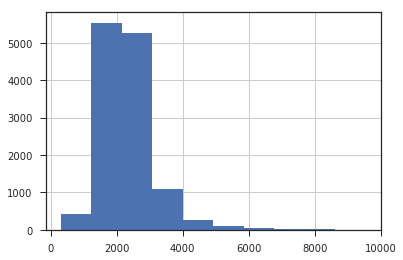

In [10]:
%matplotlib inline
df['U_S_M2'].hist()

### 2. ¿Cómo es el precio promedio para cada cuartil de antigüedad de las viviendas en la CABA?
Resolver utilizando groupby()

In [76]:
q_ant = pd.qcut(df['ANTIGUEDAD'], 4)
df.groupby(q_ant)[['DOLARES']].mean()

,DOLARES
ANTIGUEDAD,
"(-0.001, 5.0]",183477.107300
"(5.0, 30.0]",250570.962068
"(30.0, 40.0]",180525.217157
"(40.0, 115.0]",212822.615945


### 3. ¿Cómo es el precio promedio para cada decil de tamaño (columna M2)?
Resolver utilizando groupby()

In [24]:
metros = pd.qcut(df['M2'], 10)
df.groupby(metros)[['DOLARES']].mean()

,DOLARES
M2,
"(13.999, 34.0]",72342.990719
"(34.0, 40.0]",85343.722772
"(40.0, 47.0]",99520.104380
"(47.0, 55.0]",112046.517564
"(55.0, 63.0]",130499.336339
"(63.0, 74.0]",152753.276744
"(74.0, 89.1]",173960.781775
"(89.1, 115.0]",226988.144186
"(115.0, 170.0]",343407.225730


### 4. ¿Cuál es la media de precio por metro cuadrado para cada barrio de la CABA? Ordenar los datos para indicar cuál es el barrio más caro.
Nota: realizar el cálculo tanto con groupby como con pivot tables

In [40]:
df.groupby('BARRIO')[['U_S_M2']].mean().sort_values('U_S_M2', ascending=False)

,U_S_M2
BARRIO,
PUERTO MADERO,5582.909615
PALERMO,2944.154531
RETIRO,2811.813858
RECOLETA,2748.067676
NUÃEZ,2670.226065
BELGRANO,2611.026478
SAAVEDRA,2455.130702
COLEGIALES,2421.881746
VILLA DEVOTO,2417.066327


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


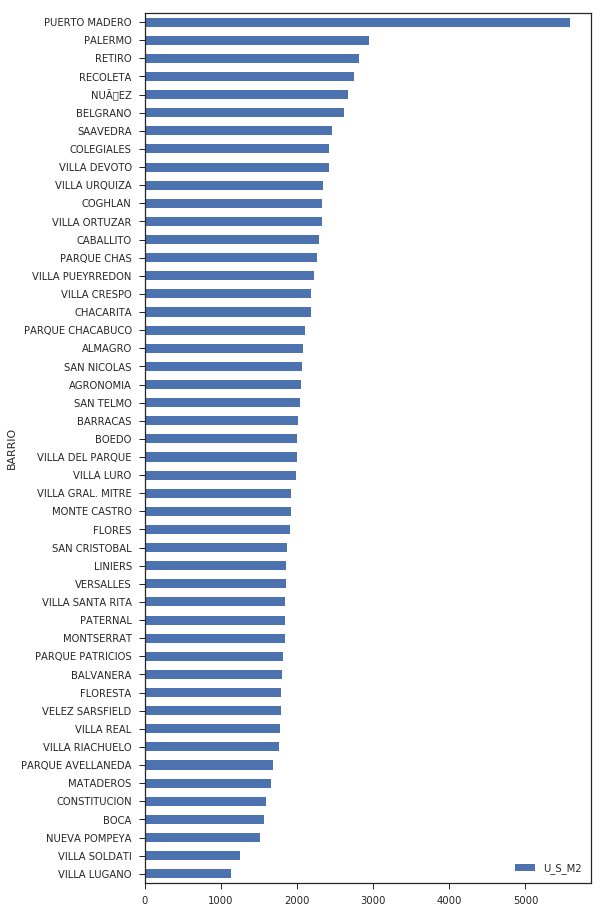

In [41]:
%matplotlib inline
df.groupby('BARRIO')[['U_S_M2']].mean().sort_values('U_S_M2').plot(kind = 'barh', figsize=(8,16))

In [45]:
df.pivot_table('U_S_M2', 'BARRIO').sort_values('U_S_M2', ascending = False)

,U_S_M2
BARRIO,
PUERTO MADERO,5582.909615
PALERMO,2944.154531
RETIRO,2811.813858
RECOLETA,2748.067676
NUÃEZ,2670.226065
BELGRANO,2611.026478
SAAVEDRA,2455.130702
COLEGIALES,2421.881746
VILLA DEVOTO,2417.066327


### 5. ¿En qué barrio hay una mayor dispersión de precios de metro cuadrado? Ordenar los valores para identificar el mayor.

(Recordar la fórmula del coeficiente de variación para medir la dispersión)

**Pistas**
* Una primera opción es definir una función con arrays y utilizar `.apply()`

In [50]:
df.pivot_table('U_S_M2', 'BARRIO', aggfunc={'U_S_M2': stats.variation }).sort_values('U_S_M2', ascending=False).head()

,U_S_M2
BARRIO,
VILLA SOLDATI,0.384682
RETIRO,0.342689
VILLA LUGANO,0.315254
CONSTITUCION,0.313690
BARRACAS,0.313679


In [78]:
df.groupby('BARRIO').apply(lambda group: stats.variation(group['U_S_M2']))

BARRIO
AGRONOMIA            0.218755
ALMAGRO              0.224794
BALVANERA            0.256805
BARRACAS             0.313679
BELGRANO             0.273006
BOCA                 0.296151
BOEDO                0.294309
CABALLITO            0.219308
CHACARITA            0.230996
COGHLAN              0.195057
COLEGIALES           0.212423
CONSTITUCION         0.313690
FLORES               0.220441
FLORESTA             0.182964
LINIERS              0.247701
MATADEROS            0.254409
MONTE CASTRO         0.201231
MONTSERRAT           0.300201
NUEVA POMPEYA        0.272360
NUÃEZ               0.236147
PALERMO              0.307299
PARQUE AVELLANEDA    0.218878
PARQUE CHACABUCO     0.240021
PARQUE CHAS          0.206251
PARQUE PATRICIOS     0.245385
PATERNAL             0.173472
PUERTO MADERO        0.242309
RECOLETA             0.263411
RETIRO               0.342689
SAAVEDRA             0.293838
SAN CRISTOBAL        0.277174
SAN NICOLAS          0.224781
SAN TELMO            0.287692
VEL

* Una segunda, es generar dos series: 
  - una con el método `.std()` y dividirla por otra serie generada con `mean()`

In [79]:
df.groupby('BARRIO')['U_S_M2'].apply(lambda x: x.std() / x.mean())

BARRIO
AGRONOMIA            0.224157
ALMAGRO              0.224915
BALVANERA            0.256931
BARRACAS             0.314212
BELGRANO             0.273090
BOCA                 0.296929
BOEDO                0.295016
CABALLITO            0.219449
CHACARITA            0.231876
COGHLAN              0.196138
COLEGIALES           0.212704
CONSTITUCION         0.314560
FLORES               0.220636
FLORESTA             0.183751
LINIERS              0.249943
MATADEROS            0.255745
MONTE CASTRO         0.202206
MONTSERRAT           0.300801
NUEVA POMPEYA        0.276016
NUÃEZ               0.236443
PALERMO              0.307419
PARQUE AVELLANEDA    0.220824
PARQUE CHACABUCO     0.240950
PARQUE CHAS          0.207719
PARQUE PATRICIOS     0.247107
PATERNAL             0.178811
PUERTO MADERO        0.243482
RECOLETA             0.263554
RETIRO               0.343333
SAAVEDRA             0.295136
SAN CRISTOBAL        0.277870
SAN NICOLAS          0.225197
SAN TELMO            0.290003
VEL

**Bonus:** ¿cuál le parece mejor y por qué?

### 6. ¿En qué barrio los departamentos son más grandes? 
¿Conviene usar la media o la mediana?

Nota: se puede realizar el cálculo tanto con groupby como con pivot tables

### 7. En general, puede observarse alguna diferencia entre el precio mediano de aquellos departamentos que tienen terraza y los que no? ¿Y en el tamaño?

### 8. Genere un `DataFrame` que agregue la información  promedio del precio por M2 (`U_S_M2`), ambientes (`AMBIENTES`) y antigüedad (`ANTIGUEDAD`) a nivel de `COMUNA` y barrio (`BARRIO`). Proporcione información tanto de la tendencia central como de la dispersión de ambas distribuciones.

### 9. Si tuvieran que tomar una decisión sobre dónde invertir en una casa... ¿qué barrio elegirían? ¿Por qué?